In [1]:
import os
import yaml
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

os.chdir("../scripts")

import preprocess, train, inference, interpret

In [2]:
with open("../model/params.yaml", "r") as params_file:
    params = yaml.safe_load(params_file)

data_dir = params['data_dir']

In [4]:
file_name = "Trepn_2022.04.04_183605_total.csv"
data = preprocess.load_data(file_name)
data.head(3)

,Time,Memory Usage,CPU Frequency,CPU Load,Wi-Fi RSSI Level,Screen Bright,Battery,Download,Upload,Quality
0,0,1824244,1144000,44,-61,3,79,456,17,360
1,10,1812244,1586000,44,-67,3,79,456,17,360
2,20,1828204,1586000,44,-63,3,79,456,17,360


In [7]:
train_df, test_df = preprocess.prep_data(df=data,train_frac=0.7, plot_df=True)

Starting with data preparation...
Completed.


In [8]:
print(train_df.shape)
print(test_df.shape)
train_df.head(10)

(323, 10)
(139, 10)


,Time,CPU Frequency,CPU Load,Memory Usage,Wi-Fi RSSI Level,Quality,Screen Bright,Battery,Download,Upload
Time,,,,,,,,,,
0,0.000000,0.575000,1.0,0.774873,0.727273,0.0,0.0,1.0,0.45629,1.0
10,0.003106,1.000000,1.0,0.675348,0.454545,0.0,0.0,1.0,0.45629,1.0
20,0.006211,1.000000,1.0,0.807717,0.636364,0.0,0.0,1.0,0.45629,1.0
30,0.009317,1.000000,1.0,0.530704,0.636364,0.0,0.0,1.0,0.45629,1.0
40,0.012422,1.000000,1.0,0.711210,0.545455,0.0,0.0,1.0,0.45629,1.0
50,0.015528,1.000000,1.0,0.421159,0.772727,0.0,0.0,1.0,0.45629,1.0
60,0.018634,0.575000,1.0,0.771721,0.772727,0.0,0.0,1.0,0.45629,1.0
70,0.021739,1.000000,1.0,0.629831,0.772727,0.0,0.0,1.0,0.45629,1.0
80,0.024845,0.281731,1.0,0.755200,0.545455,0.0,0.0,1.0,0.45629,1.0


In [9]:
test_df.head(10)

,Time,CPU Frequency,CPU Load,Memory Usage,Wi-Fi RSSI Level,Quality,Screen Bright,Battery,Download,Upload
323,1.003106,0.675000,0.0,1.020834,0.818182,1.0,0.488095,0.0,1.0,0.428571
324,1.006211,1.000000,0.0,0.592045,0.272727,1.0,0.488095,0.0,1.0,0.428571
325,1.009317,0.342308,0.0,0.630594,0.863636,1.0,0.488095,0.0,1.0,0.428571
326,1.012422,0.202885,0.0,0.774110,0.500000,1.0,0.488095,0.0,1.0,0.428571
327,1.015528,1.000000,0.0,0.592277,0.636364,1.0,0.488095,0.0,1.0,0.428571
328,1.018634,0.900000,0.0,0.648641,0.636364,1.0,0.488095,0.0,1.0,0.428571
329,1.021739,0.125000,0.0,0.775570,0.545455,1.0,0.488095,0.0,1.0,0.428571
330,1.024845,0.281731,0.0,0.462263,0.909091,1.0,0.488095,0.0,1.0,0.428571
331,1.027950,0.342308,0.0,0.419799,0.590909,1.0,0.488095,0.0,1.0,0.428571
332,1.031056,0.575000,0.0,0.746177,0.636364,1.0,0.488095,0.0,1.0,0.428571


In [10]:
plot_df = pd.read_csv(Path(data_dir, 'plot_df.csv'))
plot_df['Battery'] = plot_df.Battery
plot_df = plot_df.dropna()

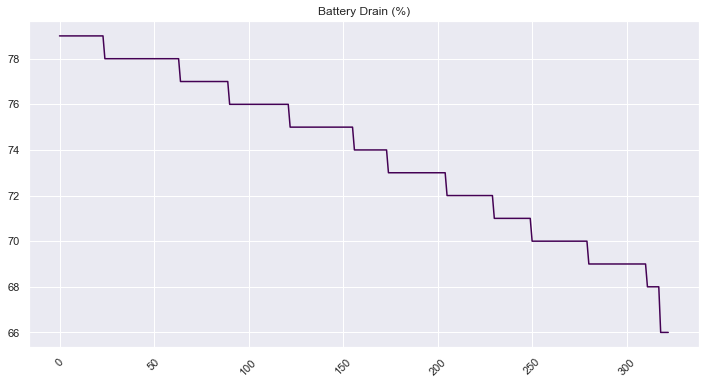

In [11]:
plot_df['Battery'].plot(figsize=(12,6), rot=45, cmap='viridis')
plt.title('Battery Drain (%)')
plt.show()

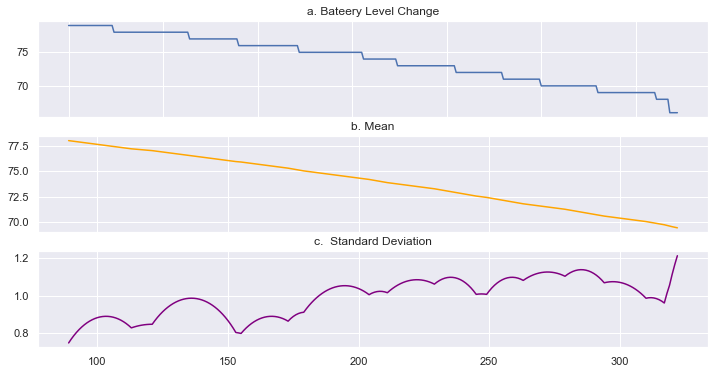

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1)
plot_df['Battery'].plot(ax=axes[0], figsize=(12,6), rot=10, title='a. Bateery Level Change', sharex=True)
plot_df['Battery'].rolling(90).mean().plot(ax=axes[1], figsize=(12,6), rot=90, title='b. Mean', color='orange')
plot_df['Battery'].rolling(90).std().plot(ax=axes[2], figsize=(12,6), rot=0, title='c.  Standard Deviation', color='purple')
plt.show()

In [13]:
sequence_length = 30
batch_size = 24
n_epochs = 200
n_epochs_stop = 20

#sequence_length = 10
#batch_size = 5
#n_epochs = 200
#n_epochs_stop = 50
label_name = 'Battery'

In [14]:
hist = train.train_model(train_df, test_df, label_name, sequence_length, batch_size, n_epochs, n_epochs_stop)

Starting with model training...
Epoch 1 train loss: 0.2073 test loss: 0.7241
Epoch 2 train loss: 0.0433 test loss: 0.5979
Epoch 3 train loss: 0.0195 test loss: 0.4743
Epoch 4 train loss: 0.0197 test loss: 0.3552
Epoch 5 train loss: 0.0222 test loss: 0.474
Epoch 6 train loss: 0.0098 test loss: 0.3277
Epoch 7 train loss: 0.016 test loss: 0.4008
Epoch 8 train loss: 0.0099 test loss: 0.3112
Epoch 9 train loss: 0.0151 test loss: 0.3687
Epoch 10 train loss: 0.0088 test loss: 0.2896
Epoch 11 train loss: 0.0102 test loss: 0.3243
Epoch 12 train loss: 0.0084 test loss: 0.2758
Epoch 13 train loss: 0.0074 test loss: 0.2905
Epoch 14 train loss: 0.0066 test loss: 0.2598
Epoch 15 train loss: 0.0055 test loss: 0.2613
Epoch 16 train loss: 0.0053 test loss: 0.2375
Epoch 17 train loss: 0.0054 test loss: 0.2266
Epoch 18 train loss: 0.0051 test loss: 0.2087
Epoch 19 train loss: 0.0053 test loss: 0.1847
Epoch 20 train loss: 0.0045 test loss: 0.167
Epoch 21 train loss: 0.0038 test loss: 0.1478
Epoch 22 train

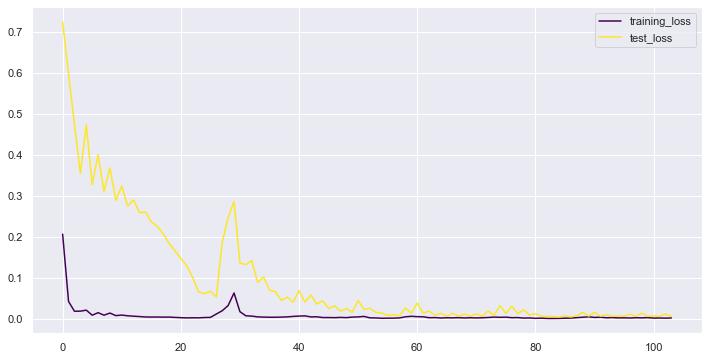

In [15]:
hist.plot(figsize=(12,6), cmap='viridis')
plt.show()

In [16]:
predictions_descaled, labels_descaled = inference.predict(df=test_df,
                                                          label_name='Battery',
                                                          sequence_length=sequence_length)

predictions_descaled.shape, predictions_descaled.shape

print(test_df.shape)

(139, 10)


In [17]:
print('Error on all test data:')
inference.print_loss_metrics(labels_descaled, predictions_descaled)
print('\n')
print('Error on partial test data:')
inference.print_loss_metrics(labels_descaled[:30], predictions_descaled[:30])

Error on all test data:
RMSE:  309.58
MAE:  271.29


Error on partial test data:
RMSE:  385.0
MAE:  382.04


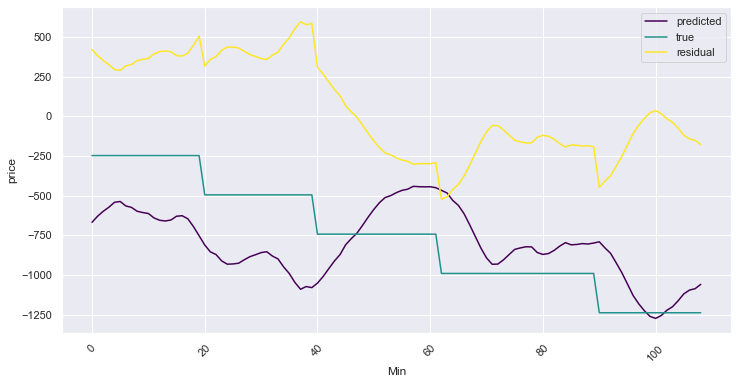

In [18]:
# plot predictions vs true values
df_pred = pd.DataFrame()
df_pred['predicted'] = predictions_descaled
df_pred['true'] = labels_descaled
df_pred['residual'] = labels_descaled - predictions_descaled
df_pred.plot(figsize=(12,6), cmap='viridis')
plt.xticks(rotation=45)
#plt.xlim(0,300)
plt.xlabel('Min')
plt.ylabel('Battery')
plt.legend()
plt.show()

In [26]:
from train import TimeSeriesDataset, TSModel
from torch.utils.data import DataLoader
import torch
import shap

In [27]:
background_data_size = 464
test_sample_size = 100
sequence_length = 30

In [28]:
shap_values = interpret.get_important_features(
    background_data_size,
    test_sample_size,
    sequence_length
)

In [29]:
shap_plot = pd.DataFrame(shap_values, columns=train_df.columns.tolist())
shap_plot['Time'] = [i-31 for i in list(range(1,31))]
shap_plot.head()

,Time,CPU Frequency,CPU Load,Memory Usage,Wi-Fi RSSI Level,Quality,Screen Bright,Battery,Download,Upload
0,-30,0.000002,0.000002,3.565089e-07,0.000001,4.476286e-07,0.000001,8.929164e-07,1.377017e-07,7.059316e-08
1,-29,0.000003,0.000002,4.986258e-07,0.000002,5.308881e-07,0.000002,6.803239e-07,2.171025e-07,8.157196e-08
2,-28,0.000005,0.000003,7.106314e-07,0.000002,6.183542e-07,0.000003,1.691163e-07,3.219812e-07,1.160953e-07
3,-27,0.000006,0.000004,1.003694e-06,0.000003,6.942094e-07,0.000004,8.911170e-07,4.715345e-07,1.793653e-07
4,-26,0.000009,0.000006,1.378741e-06,0.000004,7.247099e-07,0.000006,2.890717e-06,6.877014e-07,2.796944e-07


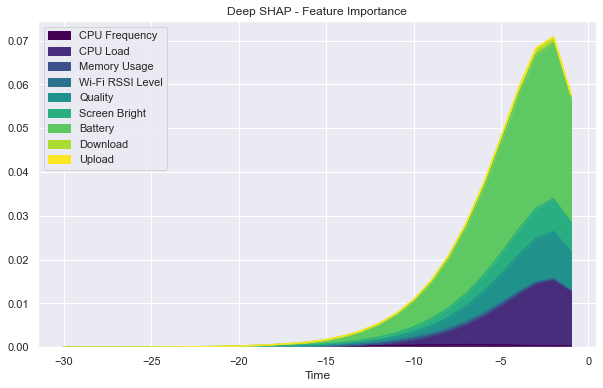

In [30]:
shap_plot.plot.area(x='Time',figsize=(10, 6), cmap='viridis')
plt.title("Deep SHAP - Feature Importance")
plt.show()